# J1 – Statistiques

## Satistiques descriptives

In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Exercice 1 – Quel pourcentile ?  (*)
Décrire cette série de nombres avec un maximum de statistiques descriptives.

_Hint: Utilisez `numpy` et `scipy`_

In [2]:
test_array = np.array([ 29.06114022,  26.17437913,  36.4492889 ,  54.90292031,
        49.44535829,  70.72485829,  67.46168782,  77.42488633,
         5.19166198,  46.1153849 , 102.91120315,  37.63296073,
        38.20406491,  71.23979213,  50.67913182,  71.61930794,
        36.13388738,  27.3738083 ,  80.05990108,  64.42082913,
        85.96083068,  38.48042099,  39.96362245,  62.00757552,
        83.12837179,  50.02396422,  73.35132353,  55.20438011,
        45.0256195 ,  18.21004262,  46.61125507,  29.79881717,
        19.16614263,  36.87047247,  34.71334354,  85.11379842,
        66.79951584,  61.00108181,  46.82147047,   4.4950038 ,
        59.64403006,  17.01467171,  40.00601743,  35.13955427,
        38.31776797,  54.1456781 ,  34.30530359, 103.841159  ,
        83.36621903,  43.18991314,  46.98826925,  66.62157158,
        41.79001612,  40.60759538,  65.20520983,  21.43783658,
        69.52452364,  86.3687045 ,  71.41994957,  47.33225797,
        21.115204  ,  55.05271646,  41.89208457,  55.22620396,
        51.83378269,  46.00827601,  44.26225881,  83.07739312,
        48.96878562,  64.82302883,  25.87666904,  48.55161088,
        48.19525418,  47.60694118,  42.81430297,  15.83639471,
        73.88628351,  59.81470386,  36.10382006,  54.88516162,
        63.63872644,  26.40355033,  81.54731183,  26.72902021,
        73.58336019,  29.31653704,  59.08846558,  47.91728695,
        20.65932672,  67.37507865,  29.69230719,  35.60901864,
        75.98322683,  74.13652542,  42.1707353 ,  36.14038798,
        63.02800873,  39.74962657,  23.85164459,  93.0516192 ])

In [3]:
mean = np.mean(test_array)
median = np.median(test_array)
std = np.std(test_array)
variance = std**2
etendue = np.max(test_array) - np.min(test_array)
q1, q3 = np.quantile(test_array, [0.25, 0.75])

In [8]:
print(f"Moyenne : {mean:.4}, \nMédiane : {median}, \nEcart-type : {std:.3}, \nVariance : {variance:.3}, \nEtendue : {etendue}, \n1er quartile : {q1}, \n3e quartile : {q3}")

Moyenne : 50.68, 
Médiane : 47.762114065, 
Ecart-type : 21.1, 
Variance : 4.45e+02, 
Etendue : 99.3461552, 
1er quartile : 36.13876283, 
3e quartile : 66.666057645


In [9]:
mode = st.mode(test_array)
mode

ModeResult(mode=array([4.4950038]), count=array([1]))

La série de données est continue, toutes les valeurs sont différentes donc le calcul du mode n'a pas d'intérêt (ici c'est simplement la valeur minimale qui est renvoyée).

In [10]:
pd.DataFrame(test_array).describe()

,0
count,100.000000
mean,50.677424
std,21.192488
min,4.495004
25%,36.138763
50%,47.762114
75%,66.666058
max,103.841159


### Exercice 2 - Le football est-il relié à l'économie ? (*)

Trouver le coefficient de correlation entre les valeurs du CAC40 et les prix des actions du Groupe OL 

_Hint: Il existe une fonction de correlation sur `numpy`_

In [11]:
cac_values = np.array([5197.79, 5011.98, 5022.38, 4858.97, 4762.78, 4695.44, 4771.39,
       4688.74, 4606.24, 4539.91, 4444.56, 4445.45, 4496.98, 4458.16,
       4498.34, 4277.63, 4273.13, 4344.95, 4472.5 , 4490.22, 4549.64,
       4501.44, 4433.38, 4483.13])

olg_values = np.array([2.34, 2.41, 2.41, 2.32, 2.27, 2.24, 2.16, 2.1 , 2.07, 2.07, 2.08,
       2.1 , 2.1 , 2.08, 2.08, 2.07, 2.06, 2.08, 2.08, 2.1 , 2.12, 2.15,
       2.14, 2.17])

In [12]:
np.corrcoef(cac_values, olg_values)

array([[1.        , 0.87975468],
       [0.87975468, 1.        ]])

In [13]:
df = pd.DataFrame({"cac": cac_values, "olg": olg_values})

In [14]:
df.head()

,cac,olg
0,5197.79,2.34
1,5011.98,2.41
2,5022.38,2.41
3,4858.97,2.32
4,4762.78,2.27


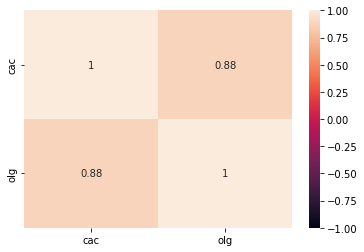

In [15]:
sns.heatmap(df.corr(), vmin=-1, annot=True)
plt.show()

La corrélation est très proche de 1, regardons ce que cela donne graphiquement ...

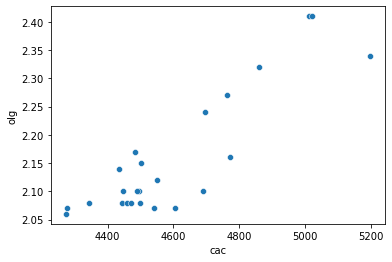

In [12]:
sns.scatterplot(data=df, x="cac", y="olg")
plt.show()

Si on se restreint aux valeurs faibles du CAC (partie gauche du graphique), la corrélation devient beaucoup moins évidente :

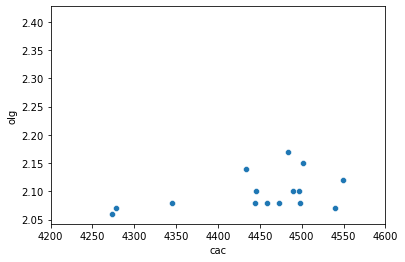

In [13]:
sns.scatterplot(data=df, x="cac", y="olg")
plt.xlim([4200, 4600])
plt.show()